In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
import warnings
warnings.filterwarnings('ignore')

# Reading the data

In [3]:
df = pd.read_csv('leads.csv')
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Data Imbalance
### We need to check the balance with respect to the target variable: converted

In [6]:
# Calculating Imbalance percentage
# Since the majority is target0 and minority is target1
# zero count
z_cnt = len(df[df['Converted'] == 0])
# one count
o_cnt = len(df[df['Converted'] == 1])
print ('Count of Converted = 0: {0} \nCount of Converted = 1: {1}'.format(z_cnt,o_cnt))
print ('Imbalance Ratio is : {0}'.format(round(z_cnt/o_cnt,2)))

Count of Converted = 0: 5679 
Count of Converted = 1: 3561
Imbalance Ratio is : 1.59


Text(0, 0.5, 'count')

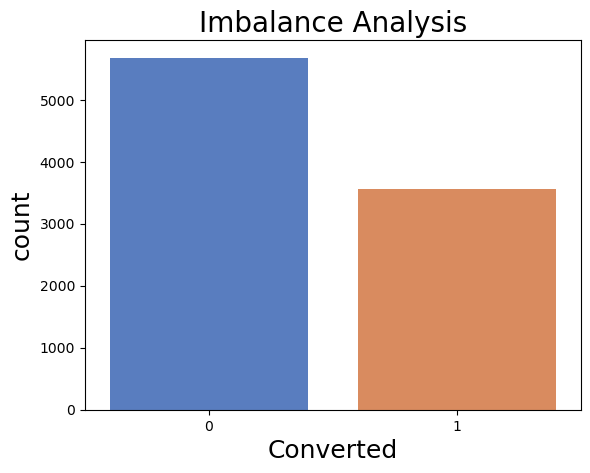

In [7]:
## Plotting the imbalance Analysis:
plt.title('Imbalance Analysis', fontsize=20)
sns.countplot(data =df, x='Converted', palette='muted')
plt.xlabel('Converted', fontsize=18)
plt.ylabel('count', fontsize=18)

### The data is not too much imbalanced. As such, we can proceed with the data for analysis and model building

In [9]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
df['Lead Profile'].unique()

array(['Select', 'Potential Lead', nan, 'Other Leads', 'Lateral Student',
       'Dual Specialization Student', 'Student of SomeSchool'],
      dtype=object)

In [11]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [12]:
    #removing the columns which are not contributing towards leads conversion and with null values above 40%

df.drop(['Asymmetrique Activity Index', 'Asymmetrique Profile Index',
            'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
            'Tags', 'Lead Quality'], axis=1, inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
#there are no duplicates in the data

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [16]:
df.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,...,9240,9240,9240,9240,9240,6531,7820,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,...,2,2,1,1,1,6,7,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,...,9236,9233,9240,9240,9240,4146,3222,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Since prospect ID and Lead Number does not contribute to lead generation, hence removing the columns
df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [18]:
df.isnull().mean()

Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.155628
How did you hear about X Education               0.238853
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Fo

# Data Cleaning

In [20]:
# As we can observe that there are select values for many column.
# This is because customer did not select any option from the list, hence it shows select.
# Select values are as good as NULL.

In [21]:
df = df.replace(['select', 'Select'], np.nan)
df.isnull().mean()*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [22]:
#since 'How did you hear about X Education' and 'Lead Profile' have null values above 70%, we can remove these columns
df.drop(['How did you hear about X Education','Lead Profile'], axis=1, inplace = True)
df.isnull().mean()*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [23]:
#imputing the null value for the features

In [24]:
df.Country.describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [25]:
df.Country.value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [26]:
#Imputing the nan value with mode, 'India'
df['Country'] = df['Country'].replace(np.nan, 'India')

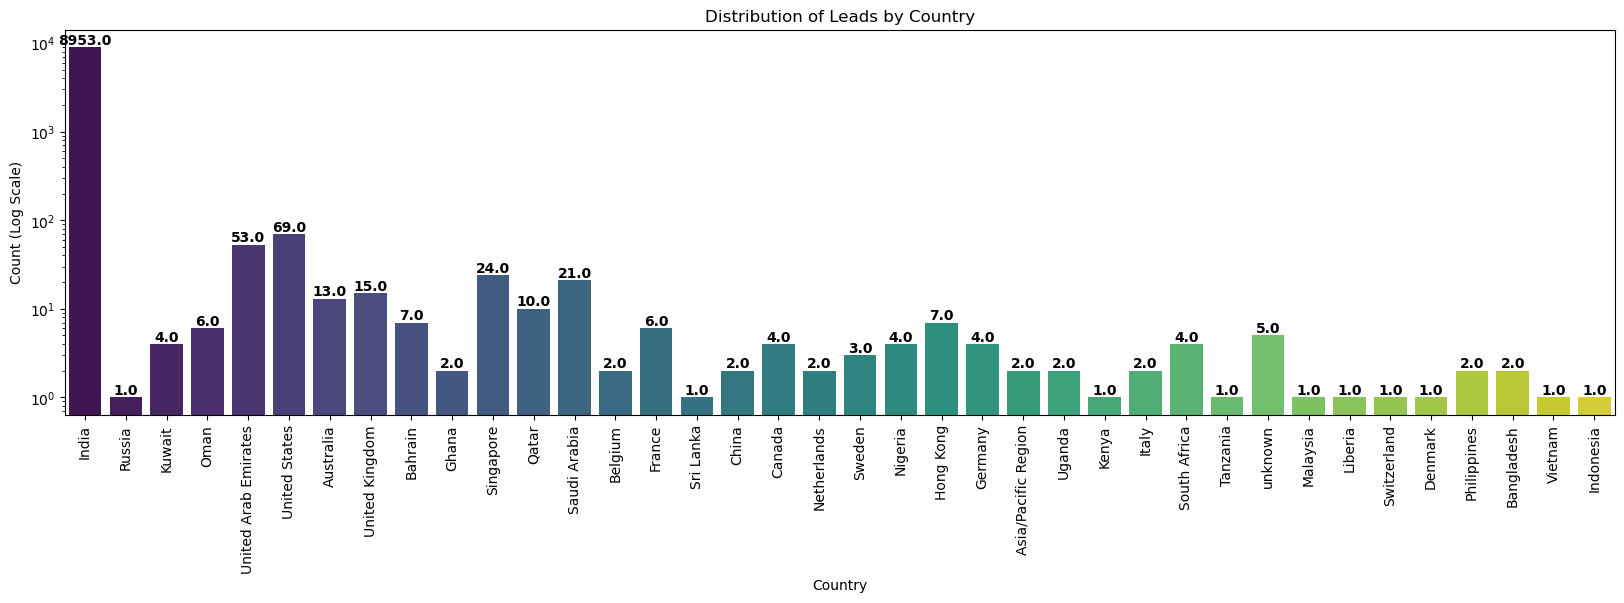

In [27]:
plt.figure(figsize=(20, 5))
ax = sns.countplot(x=df['Country'], palette='viridis')  # Different color palette

# Annotating bars with count values
for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.xticks(rotation=90)
ax.set_yscale('log')  # Log scale for better visualization
plt.xlabel("Country")
plt.ylabel("Count (Log Scale)")
plt.title("Distribution of Leads by Country")
plt.show()

In [28]:
#imputing for column Specialization
df.Specialization.unique()

array([nan, 'Business Administration', 'Media and Advertising',
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [29]:
df.Specialization.value_counts()

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

In [30]:
# It maybe the case that leads has not entered any specialization if his/her option is not availabe on the list,
#  may not have any specialization or is a student.
# Hence we can make a category "Others" for missing values.

df['Specialization'] = df['Specialization'].replace(np.nan, 'Others')

In [31]:
df['Specialization'].value_counts()

Specialization
Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [32]:
df['What is your current occupation'].unique()

array(['Unemployed', 'Student', nan, 'Working Professional',
       'Businessman', 'Other', 'Housewife'], dtype=object)

In [33]:
df['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [34]:
df['What is your current occupation'].isnull().sum()

2690

In [35]:
# Most of the entries are of Unemployed so we can impute "Unemployed" in it.
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [36]:
df['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [37]:
#imputing for column city
df['City'].unique()

array([nan, 'Mumbai', 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [38]:
df['City'].value_counts()

City
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [39]:
## Most of the data available is of Mumbai so we can impute Mumbai in the missing values.
df['City'] = df['City'].replace(np.nan, 'Mumbai')

In [40]:
df['City'].value_counts()

City
Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [41]:
# imputing for column : What matters most to you in choosing a course
df['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [42]:
#imputing with : Better Career Prospects
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [43]:
df['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [44]:
df.isnull().mean()*100

Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper     

In [45]:
df['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [46]:
#since there are Google and google, replacing it with Google
df['Lead Source'] = df['Lead Source'].replace('google', 'Google')

#replace the values with 1, with others
df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')
df['Lead Source'].value_counts()

Lead Source
Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: count, dtype: int64

In [47]:
#replacing nan with the mode i.e. Google
df['Lead Source'] = df['Lead Source'].replace(np.nan, 'Google')
df['Lead Source'].value_counts()

Lead Source
Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: count, dtype: int64

In [48]:
# imputing Last Activity
df['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [49]:
#imputing the null values with mode, i.e. Email Opened
df['Last Activity'] = df['Last Activity'].replace(np.nan, 'Email Opened')
df['Last Activity'].value_counts()

Last Activity
Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [50]:
#imputing for numerical columns with median
df['TotalVisits'] = df['TotalVisits'].fillna(df['TotalVisits'].median())
df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median())

In [51]:
df.isnull().mean()*100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [52]:
#Our data is now cleaned and we can move further with EDA

# EDA

### Univariate Analysis

([<matplotlib.patches.Wedge at 0x16dfc538b30>,
 [Text(-0.38756250774201845, 1.0294635994500816, '0'),
  Text(0.3875624113566783, -1.0294636357362978, '1')],
 [Text(-0.2113977314956464, 0.5615255997000445, '61.46%'),
  Text(0.2113976789218245, -0.5615256194925261, '38.54%')])

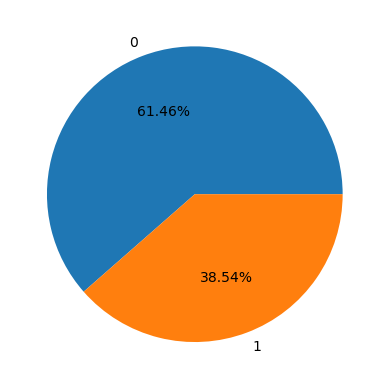

In [55]:
#target coumn
plt.pie(df['Converted'].value_counts(), labels=df['Converted'].value_counts().index, autopct='%.2f%%')

In [56]:
# According to the pie chart, there is 38.5% conversation rate of leads
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

### Checking for other features
### 1. Categorical Features

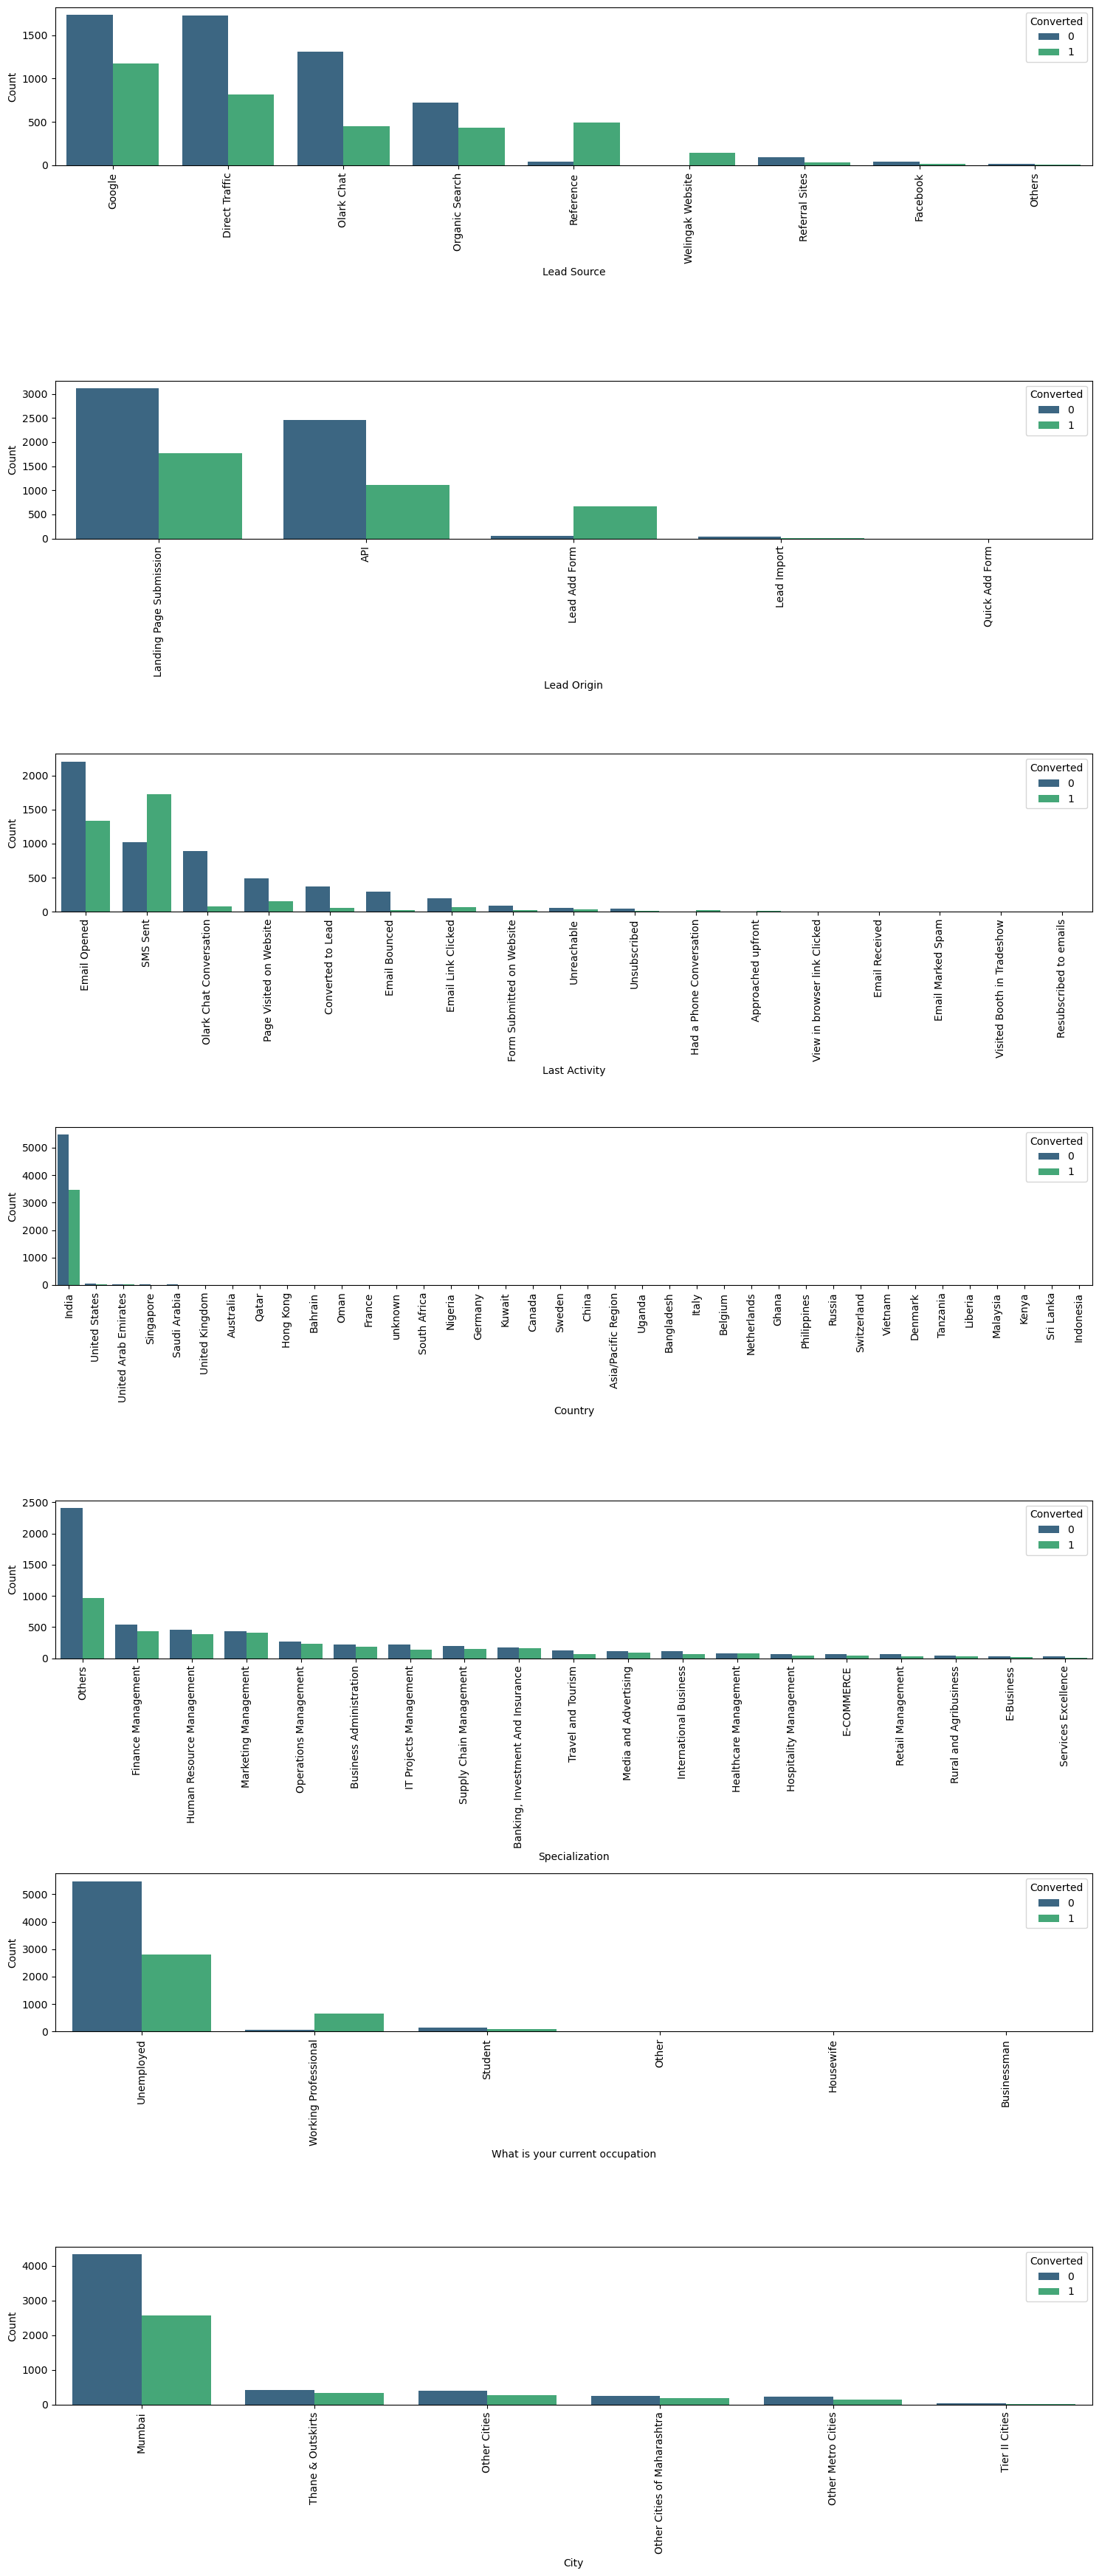

In [58]:
category = ['Lead Source', 'Lead Origin', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'City']


def plot_frequency_distribution(df, columns):
    """Plots bar charts for the frequency distribution of categorical columns."""
    plt.figure(figsize=(15, 5*len(columns)))  # Adjust figure size based on the number of columns
    
    for i, col in enumerate(columns, 1):
        plt.subplot(len(columns), 1, i)  # Create subplots
        sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis', hue='Converted')
        plt.xticks(rotation=90)  # Rotate labels for readability
        plt.xlabel(col)
        plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

plot_frequency_distribution(df, category)

### Insights from the graphs:
1. Top Lead Sources: The primary sources of leads are Google, Direct Traffic, and Olark Chat, all of which show a strong conversion rate. Additionally, leads acquired through Referrals and the Welingak Website exhibit exceptionally high conversion rates.
2. Top Lead Origins: The most common lead origins are Landing Page Submissions, API, and Lead Add Forms, with Lead Add Forms having the highest conversion rate.
3. Top User Activities: The most frequent last activities of leads include Email Opened, SMS Sent, and Olark Chat Conversations, with SMS Sent leading to the highest conversion rate.
4. Geographic Insights: A significant majority of leads originate from India.
5. Specialization Category: The "Others" category in specialization accounts for the highest number of leads and conversions.
6. Employment Status: While most leads come from unemployed individuals, working professionals demonstrate the highest conversion rates.
7. Regional Insights: The majority of leads are generated from Maharashtra, which also records a high conversion rate.

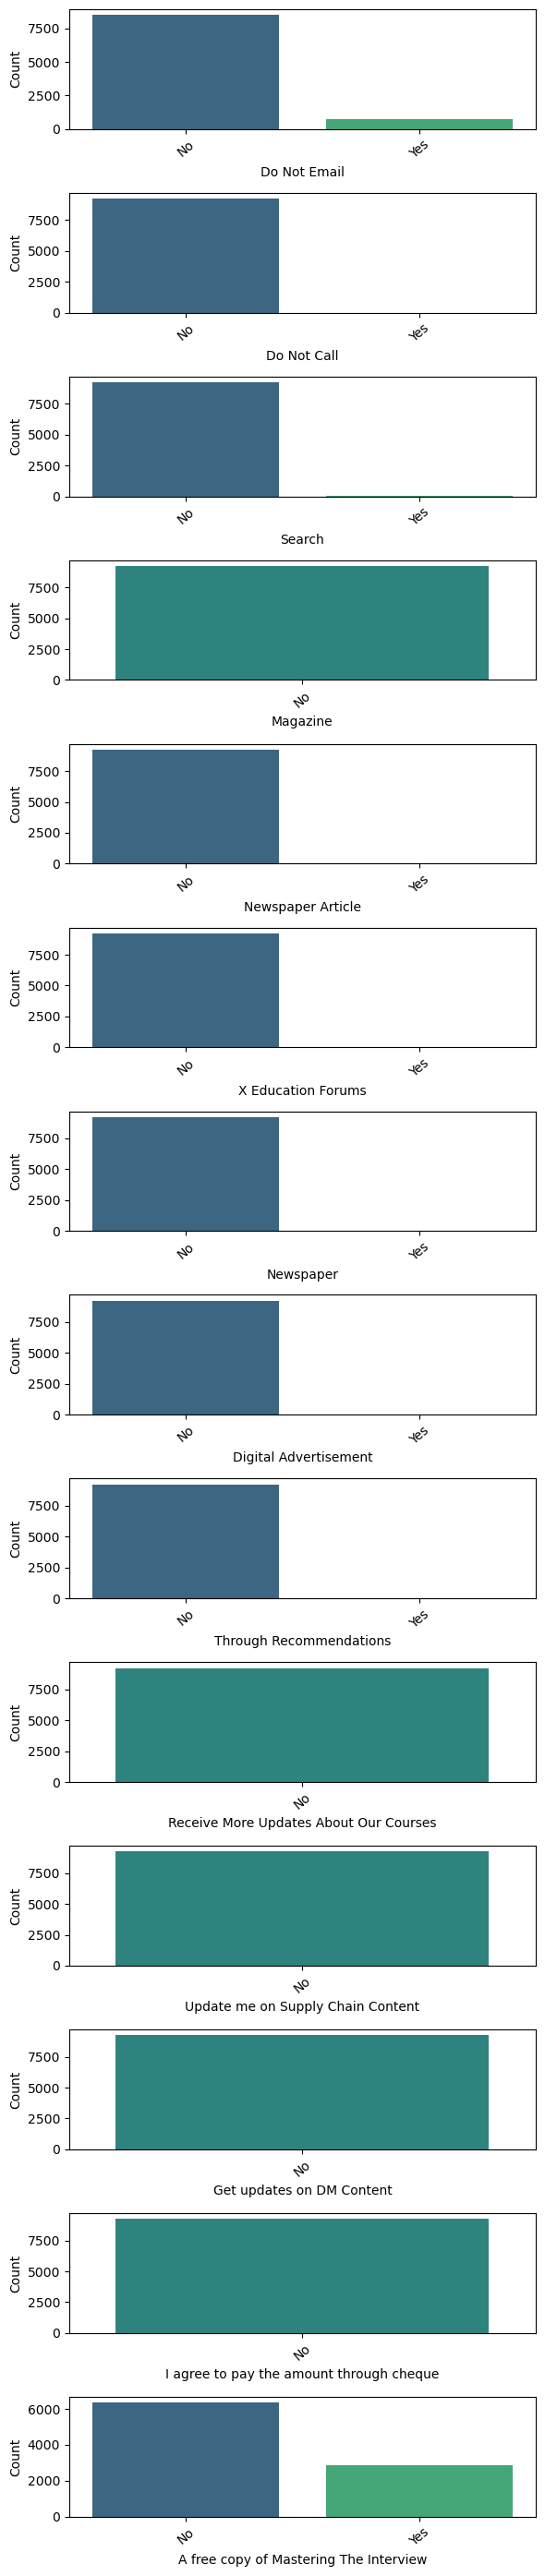

In [60]:
yesno_category= ['Do Not Email', 'Do Not Call', 'Search',	'Magazine',	'Newspaper Article',	'X Education Forums',	'Newspaper',	
'Digital Advertisement','Through Recommendations',	'Receive More Updates About Our Courses',
'Update me on Supply Chain Content',	'Get updates on DM Content', 'I agree to pay the amount through cheque',	'A free copy of Mastering The Interview'
]


def plot_count(df, columns):
    """Plots bar charts for the frequency distribution of categorical columns."""
    plt.figure(figsize=(6, 2*len(columns)))  # Adjust figure size based on the number of columns
    
    for i, col in enumerate(columns, 1):
        plt.subplot(len(columns), 1, i)  # Create subplots
        sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')
        plt.xticks(rotation=40)  # Rotate labels for readability
        plt.xlabel(col)
        plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

plot_count(df, yesno_category)

### From the above visualisation, following can be noted:
1. Most of the yes no categories are not having any positive response, i.e. they are only having NO
2. Only one feature, "A free copy of mastering the interview" has relevant no. of yes
3. Hence we can remove all the unnecessary features before building our model¶

In [62]:
df.drop(['Do Not Email', 'Do Not Call', 'Search',	'Magazine',	'Newspaper Article',	'X Education Forums',	'Newspaper',	
'Digital Advertisement','Through Recommendations',	'Receive More Updates About Our Courses',
'Update me on Supply Chain Content',	'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1, inplace=True)

In [63]:
df

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.00,Page Visited on Website,India,Others,Unemployed,Better Career Prospects,Mumbai,No,Modified
1,API,Organic Search,0,5.0,674,2.50,Email Opened,India,Others,Unemployed,Better Career Prospects,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.00,Email Opened,India,Business Administration,Student,Better Career Prospects,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.00,Converted to Lead,India,Others,Unemployed,Better Career Prospects,Mumbai,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Unemployed,Better Career Prospects,Mumbai,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,0,2.0,199,2.00,SMS Sent,India,Business Administration,Unemployed,Better Career Prospects,Mumbai,Yes,SMS Sent
9238,Landing Page Submission,Google,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Unemployed,Better Career Prospects,Other Metro Cities,No,SMS Sent


### 2. Numerical Features

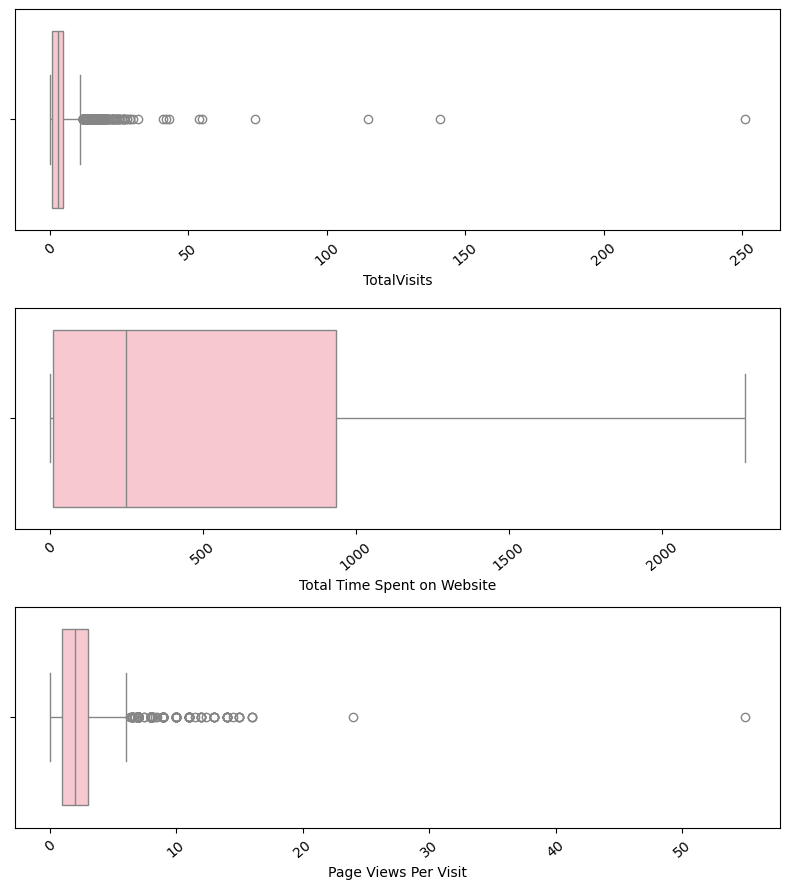

In [64]:
numerical = ['TotalVisits',	'Total Time Spent on Website',	'Page Views Per Visit']

def plot_box(df, columns):
    plt.figure(figsize=(8,3*len(columns)))  # Adjust figure size based on the number of columns
    
    for i, col in enumerate(columns, 1):
        plt.subplot(len(columns), 1, i)  # Create subplots
        sns.boxplot(data=df, x=col, color='pink')
        plt.xticks(rotation=40)  # Rotate labels for readability
        plt.xlabel(col)
    plt.tight_layout()
    plt.show()

plot_box(df, numerical)

### From the above boxplots, we can conclude that:
There are no outliers present in the feature "total time spent on Website", whereas "Page Views Per Visit" and "TotalVisits" has multiple outliers"

In [66]:
df['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [67]:
df.TotalVisits.describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

## Bivariate Analysis

<Axes: xlabel='Lead Source,Converted'>

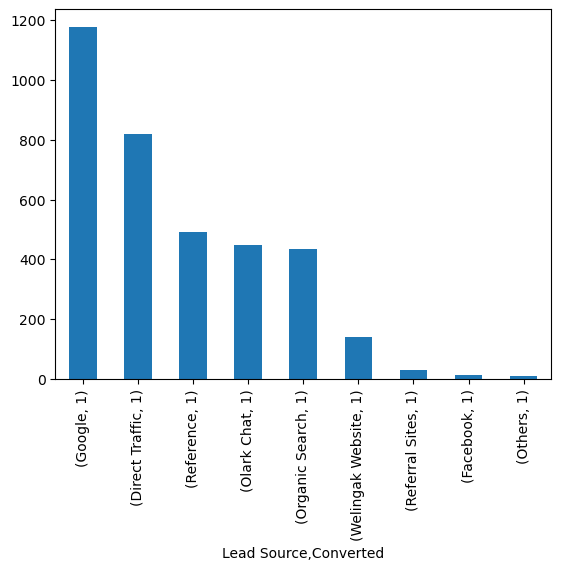

In [69]:
df[df['Converted']==1].groupby('Lead Source')['Converted'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [70]:
#let's check what's the no. of non converted leads
df[df['Converted']==0].groupby('Lead Source')['Converted'].value_counts()

Lead Source       Converted
Direct Traffic    0            1725
Facebook          0              42
Google            0            1733
Olark Chat        0            1307
Organic Search    0             718
Others            0              14
Reference         0              44
Referral Sites    0              94
Welingak Website  0               2
Name: count, dtype: int64

In [71]:
### Google has the highest conversion rate out of all Lead Sources

<Axes: >

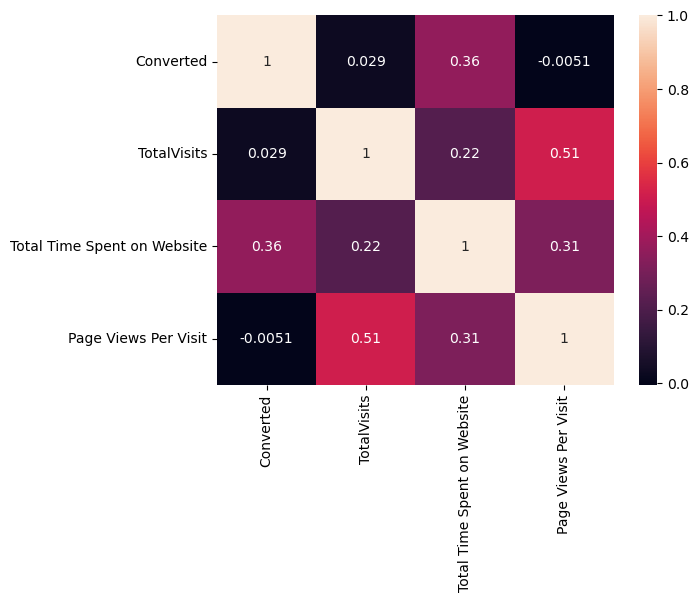

In [72]:
nums = ['Converted', 'TotalVisits',	'Total Time Spent on Website',	'Page Views Per Visit']
sns.heatmap(df[nums].corr(), annot=True)

# Outlier Treatment

From the above boxplots, we can see that Totalvisits and Page Views per Visit has no. of outliers which can significantly affect our model
Checking different transformation techniques in order to treat outliers

In [75]:
#Log method
df['log_TotalVisit'] = np.log1p(df['TotalVisits'])  # log1p to avoid log(0)
df['log_TotalVisit']

0       0.000000
1       1.791759
2       1.098612
3       0.693147
4       1.098612
          ...   
9235    2.197225
9236    1.098612
9237    1.098612
9238    1.386294
9239    1.945910
Name: log_TotalVisit, Length: 9240, dtype: float64

<Axes: xlabel='log_TotalVisit'>

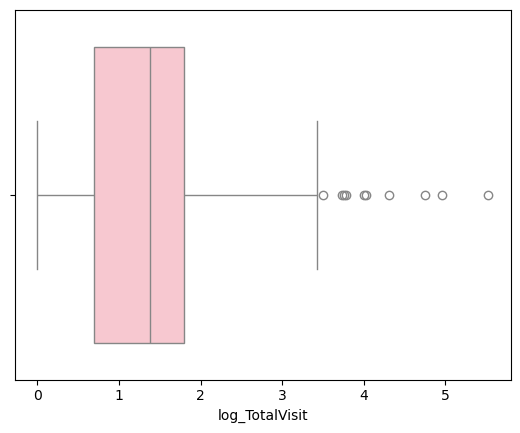

In [76]:
sns.boxplot(data=df, x='log_TotalVisit', color='pink')

In [77]:
#Squareroot method
df['sqrt_TotalVisit'] = np.sqrt(df['TotalVisits'])  # log1p to avoid log(0)
df['sqrt_TotalVisit']

0       0.000000
1       2.236068
2       1.414214
3       1.000000
4       1.414214
          ...   
9235    2.828427
9236    1.414214
9237    1.414214
9238    1.732051
9239    2.449490
Name: sqrt_TotalVisit, Length: 9240, dtype: float64

<Axes: xlabel='sqrt_TotalVisit'>

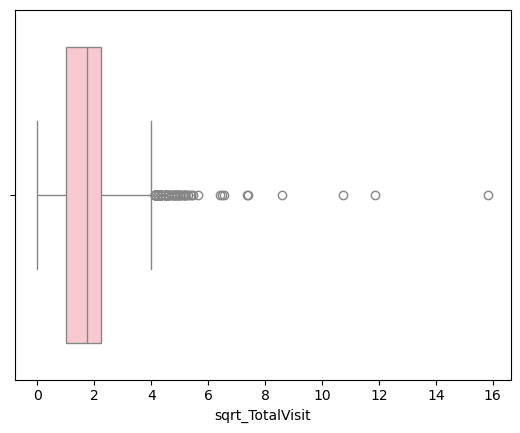

In [78]:
sns.boxplot(data=df, x='sqrt_TotalVisit', color='pink')

<Axes: xlabel='reciprocal_columntv'>

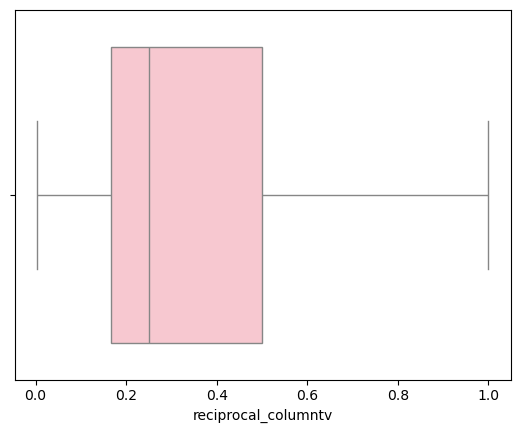

In [79]:
#Reciprocal
df['reciprocal_columntv'] = 1 / (df['TotalVisits']+1)
sns.boxplot(data=df, x='reciprocal_columntv', color='pink')

In [80]:
#Following reciprocal transformation for TotalVisits, we can see that there are no outliers now

In [81]:
#Applying the transformations to other column, 'Page Views Per Visit' as well

<Axes: xlabel='log_TotalVisitpv'>

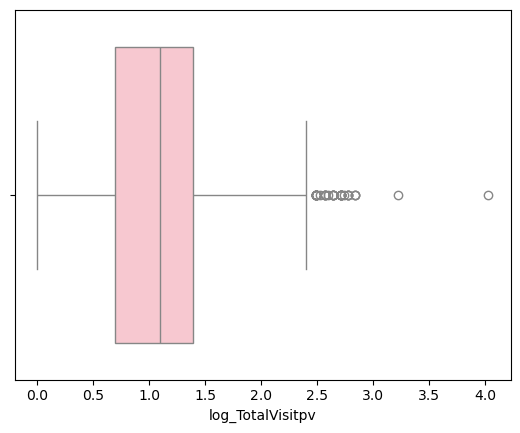

In [82]:
df['log_TotalVisitpv'] = np.log1p(df['Page Views Per Visit'])  # log1p to avoid log(0)
sns.boxplot(data=df, x='log_TotalVisitpv', color='pink')

<Axes: xlabel='reciprocal_columnpv'>

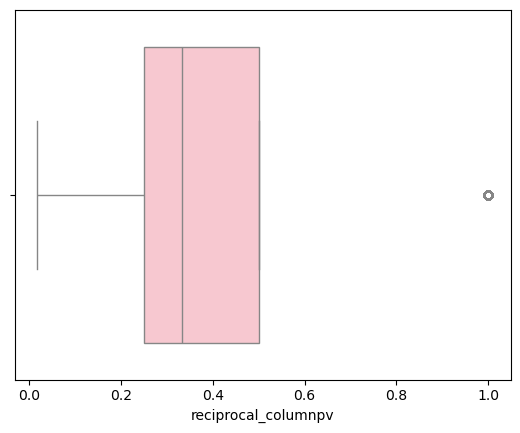

In [83]:
df['reciprocal_columnpv'] = 1 / (df['Page Views Per Visit']+1)
sns.boxplot(data=df, x='reciprocal_columnpv', color='pink')

<Axes: xlabel='sqrt_pv'>

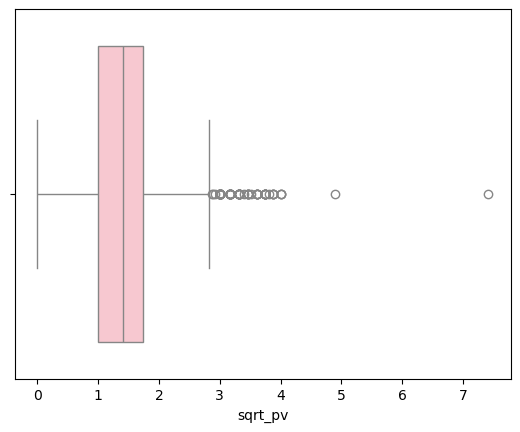

In [84]:
df['sqrt_pv'] = np.sqrt(df['Page Views Per Visit'])  # log1p to avoid log(0)
sns.boxplot(data=df, x='sqrt_pv', color='pink')

<Axes: xlabel='boxcox_column'>

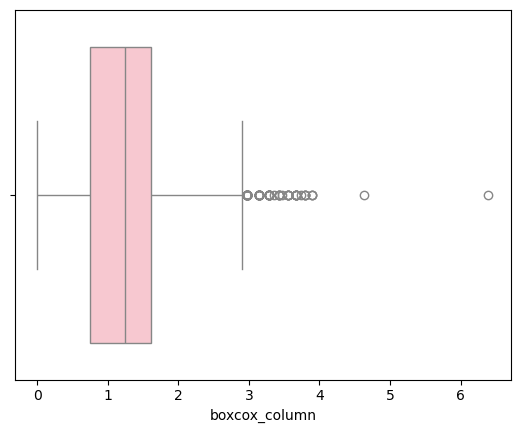

In [85]:
from scipy.stats import boxcox
df['boxcox_column'], _ = boxcox(df['Page Views Per Visit'] + 1) 
sns.boxplot(data=df, x='boxcox_column', color='pink')

<Axes: xlabel='winsorized_column'>

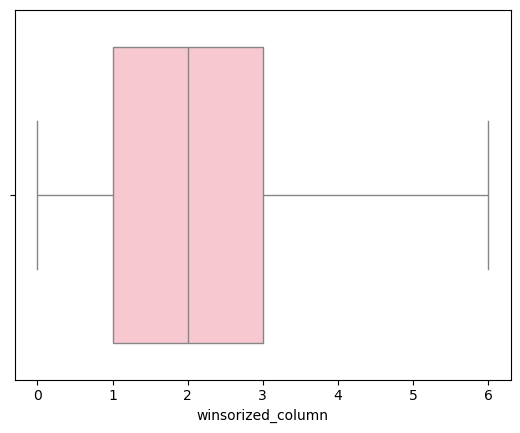

In [86]:
from scipy.stats.mstats import winsorize
df['winsorized_column'] = winsorize(df['Page Views Per Visit'], limits=[0.05, 0.05])  # Cap bottom & top 5%
sns.boxplot(data=df, x='winsorized_column', color='pink')

In [87]:
#Following winsorize transformation for Page Views per Visit, we can see that there are no outliers now

In [88]:
df

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,...,A free copy of Mastering The Interview,Last Notable Activity,log_TotalVisit,sqrt_TotalVisit,reciprocal_columntv,log_TotalVisitpv,reciprocal_columnpv,sqrt_pv,boxcox_column,winsorized_column
0,API,Olark Chat,0,0.0,0,0.00,Page Visited on Website,India,Others,Unemployed,...,No,Modified,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00
1,API,Organic Search,0,5.0,674,2.50,Email Opened,India,Others,Unemployed,...,No,Email Opened,1.791759,2.236068,0.166667,1.252763,0.285714,1.581139,1.437302,2.50
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.00,Email Opened,India,Business Administration,Student,...,Yes,Email Opened,1.098612,1.414214,0.333333,1.098612,0.333333,1.414214,1.238909,2.00
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Unemployed,...,No,Modified,0.693147,1.000000,0.500000,0.693147,0.500000,1.000000,0.747348,1.00
4,Landing Page Submission,Google,1,2.0,1428,1.00,Converted to Lead,India,Others,Unemployed,...,No,Modified,1.098612,1.414214,0.333333,0.693147,0.500000,1.000000,0.747348,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Unemployed,...,No,Email Marked Spam,2.197225,2.828427,0.111111,1.300192,0.272480,1.634013,1.499675,2.67
9236,Landing Page Submission,Direct Traffic,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Unemployed,...,Yes,SMS Sent,1.098612,1.414214,0.333333,1.098612,0.333333,1.414214,1.238909,2.00
9237,Landing Page Submission,Direct Traffic,0,2.0,199,2.00,SMS Sent,India,Business Administration,Unemployed,...,Yes,SMS Sent,1.098612,1.414214,0.333333,1.098612,0.333333,1.414214,1.238909,2.00
9238,Landing Page Submission,Google,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Unemployed,...,No,SMS Sent,1.386294,1.732051,0.250000,1.386294,0.250000,1.732051,1.614544,3.00


In [89]:
# storing the standardised values to actual columns

In [90]:
df['TotalVisits'] = df['reciprocal_columntv']

In [91]:
df['Page Views Per Visit']=df['winsorized_column']

In [92]:
df

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,...,A free copy of Mastering The Interview,Last Notable Activity,log_TotalVisit,sqrt_TotalVisit,reciprocal_columntv,log_TotalVisitpv,reciprocal_columnpv,sqrt_pv,boxcox_column,winsorized_column
0,API,Olark Chat,0,1.000000,0,0.00,Page Visited on Website,India,Others,Unemployed,...,No,Modified,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00
1,API,Organic Search,0,0.166667,674,2.50,Email Opened,India,Others,Unemployed,...,No,Email Opened,1.791759,2.236068,0.166667,1.252763,0.285714,1.581139,1.437302,2.50
2,Landing Page Submission,Direct Traffic,1,0.333333,1532,2.00,Email Opened,India,Business Administration,Student,...,Yes,Email Opened,1.098612,1.414214,0.333333,1.098612,0.333333,1.414214,1.238909,2.00
3,Landing Page Submission,Direct Traffic,0,0.500000,305,1.00,Unreachable,India,Media and Advertising,Unemployed,...,No,Modified,0.693147,1.000000,0.500000,0.693147,0.500000,1.000000,0.747348,1.00
4,Landing Page Submission,Google,1,0.333333,1428,1.00,Converted to Lead,India,Others,Unemployed,...,No,Modified,1.098612,1.414214,0.333333,0.693147,0.500000,1.000000,0.747348,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,0.111111,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Unemployed,...,No,Email Marked Spam,2.197225,2.828427,0.111111,1.300192,0.272480,1.634013,1.499675,2.67
9236,Landing Page Submission,Direct Traffic,0,0.333333,238,2.00,SMS Sent,India,Media and Advertising,Unemployed,...,Yes,SMS Sent,1.098612,1.414214,0.333333,1.098612,0.333333,1.414214,1.238909,2.00
9237,Landing Page Submission,Direct Traffic,0,0.333333,199,2.00,SMS Sent,India,Business Administration,Unemployed,...,Yes,SMS Sent,1.098612,1.414214,0.333333,1.098612,0.333333,1.414214,1.238909,2.00
9238,Landing Page Submission,Google,1,0.250000,499,3.00,SMS Sent,India,Human Resource Management,Unemployed,...,No,SMS Sent,1.386294,1.732051,0.250000,1.386294,0.250000,1.732051,1.614544,3.00


In [171]:
#Now removing the extra columns that were made due to transformation

In [173]:
df = df.iloc[:,:14]

In [175]:
df

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,1.000000,0,0.00,Page Visited on Website,India,Others,Unemployed,Better Career Prospects,Mumbai,No,Modified
1,API,Organic Search,0,0.166667,674,2.50,Email Opened,India,Others,Unemployed,Better Career Prospects,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,0.333333,1532,2.00,Email Opened,India,Business Administration,Student,Better Career Prospects,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,0.500000,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,No,Modified
4,Landing Page Submission,Google,1,0.333333,1428,1.00,Converted to Lead,India,Others,Unemployed,Better Career Prospects,Mumbai,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,0.111111,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Unemployed,Better Career Prospects,Mumbai,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,0,0.333333,238,2.00,SMS Sent,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,0,0.333333,199,2.00,SMS Sent,India,Business Administration,Unemployed,Better Career Prospects,Mumbai,Yes,SMS Sent
9238,Landing Page Submission,Google,1,0.250000,499,3.00,SMS Sent,India,Human Resource Management,Unemployed,Better Career Prospects,Other Metro Cities,No,SMS Sent


<Axes: xlabel='TotalVisits'>

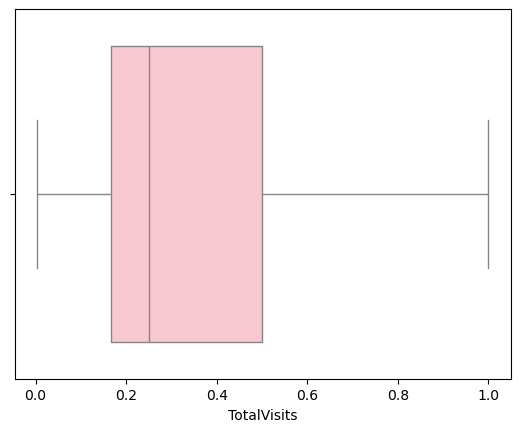

In [177]:
sns.boxplot(data=df, x='TotalVisits', color='pink')

<Axes: xlabel='Page Views Per Visit'>

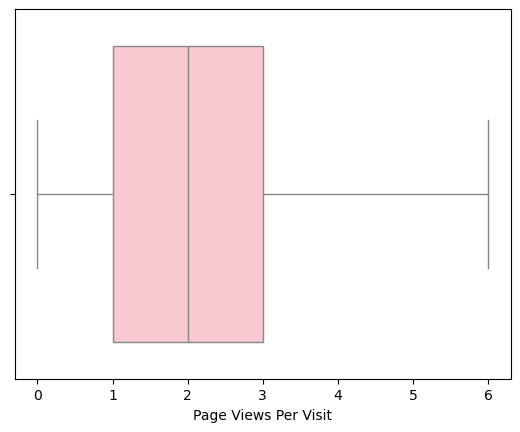

In [178]:
sns.boxplot(data=df, x='Page Views Per Visit', color='pink')

# Creating Model

In [182]:
# Splitting X and Y
X = df.drop('Converted', axis=1)
y = df['Converted']
X

,Lead Origin,Lead Source,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,1.000000,0,0.00,Page Visited on Website,India,Others,Unemployed,Better Career Prospects,Mumbai,No,Modified
1,API,Organic Search,0.166667,674,2.50,Email Opened,India,Others,Unemployed,Better Career Prospects,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,0.333333,1532,2.00,Email Opened,India,Business Administration,Student,Better Career Prospects,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0.500000,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,No,Modified
4,Landing Page Submission,Google,0.333333,1428,1.00,Converted to Lead,India,Others,Unemployed,Better Career Prospects,Mumbai,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,0.111111,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Unemployed,Better Career Prospects,Mumbai,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,0.333333,238,2.00,SMS Sent,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,0.333333,199,2.00,SMS Sent,India,Business Administration,Unemployed,Better Career Prospects,Mumbai,Yes,SMS Sent
9238,Landing Page Submission,Google,0.250000,499,3.00,SMS Sent,India,Human Resource Management,Unemployed,Better Career Prospects,Other Metro Cities,No,SMS Sent


In [183]:
y

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9240, dtype: int64

In [184]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_test, y_train, y_test

(                  Lead Origin     Lead Source  TotalVisits  \
 5321  Landing Page Submission          Google     0.200000   
 2575            Lead Add Form       Reference     1.000000   
 3363  Landing Page Submission  Direct Traffic     0.333333   
 955                       API  Referral Sites     0.111111   
 6406  Landing Page Submission  Direct Traffic     0.500000   
 ...                       ...             ...          ...   
 2895  Landing Page Submission  Organic Search     0.200000   
 7813  Landing Page Submission          Google     0.250000   
 905                       API          Google     0.333333   
 5192                      API          Google     0.333333   
 235   Landing Page Submission  Organic Search     0.076923   
 
       Total Time Spent on Website  Page Views Per Visit  \
 5321                          239                   4.0   
 2575                            0                   0.0   
 3363                          271                   2.0   
 9

In [185]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7392, 13), (1848, 13), (7392,), (1848,))

In [313]:
numerical = ['TotalVisits',	'Total Time Spent on Website',	'Page Views Per Visit']
categorical = [col for col in df.columns if df[col].dtype == 'object']
numerical, categorical

(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'],
 ['Lead Origin',
  'Lead Source',
  'Last Activity',
  'Country',
  'Specialization',
  'What is your current occupation',
  'What matters most to you in choosing a course',
  'City',
  'A free copy of Mastering The Interview',
  'Last Notable Activity'])

In [237]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [239]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Define the preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),  # Standard scaling for numerical data
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical)  # OHE for categorical data
])

# Fit the transformer only on training data & transform both train & test sets
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [241]:
X_train

<7392x110 sparse matrix of type '<class 'numpy.float64'>'
	with 72918 stored elements in Compressed Sparse Row format>

In [243]:
X_test

<1848x110 sparse matrix of type '<class 'numpy.float64'>'
	with 18237 stored elements in Compressed Sparse Row format>

In [245]:
# Creating Logistic Regression model

In [247]:

classifier = LogisticRegression()
classifier

LogisticRegression()

In [249]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [251]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [253]:
accuracy_score(y_test, y_pred)

0.8235930735930735

In [255]:
#There might be overfitting, hence applying hyperparameter tuning

In [257]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
params = {
 'C': [0.01, 0.1, 1,10,50,100,200],
 'penalty' : ['l1','l2', 'elasticnet']
}
lr_grid = GridSearchCV(classifier, param_grid=params, cv=5, verbose=3, scoring='accuracy')
lr_grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 50, 100, 200],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy', verbose=3)

In [259]:
lr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV 1/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ................C=0.01, penalty=l2;, score=0.787 total time=   0.0s
[CV 2/5] END ................C=0.01, penalty=l2;, score=0.824 total time=   0.0s
[CV 3/5] END ................C=0.01, penalty=l2;, score=0.802 total time=   0.0s
[CV 4/5] END ................C=0.01, penalty=l2;, score=0.803 total time=   0.0s
[CV 5/5] END ................C=0.01, penalty=l2;, score=0.794 total time=   0.0s
[CV 1/5] END ..........C=0.01, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5] END ..........C=0.01, penalty=elasticn

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 50, 100, 200],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy', verbose=3)

In [260]:
lr_grid.best_params_

{'C': 10, 'penalty': 'l2'}

In [261]:
lr_grid.best_score_

0.8156102439109189

In [265]:
lr_grid.best_estimator_

LogisticRegression(C=10)

In [267]:
y_pred_grid = lr_grid.best_estimator_.predict(X_test)

In [269]:
accuracy_score(y_test, y_pred_grid)

0.8225108225108225

In [271]:
lr_random = RandomizedSearchCV(classifier, param_distributions=params, cv=5, verbose=3, scoring='accuracy', random_state=1)
lr_random

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.01, 0.1, 1, 10, 50, 100, 200],
                                        'penalty': ['l1', 'l2', 'elasticnet']},
                   random_state=1, scoring='accuracy', verbose=3)

In [273]:
lr_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...................C=100, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ...................C=100, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ...................C=100, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ...................C=100, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ...................C=100, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ..................C=10, penalty=l2;, score=0.805 total time=   0.0s
[CV 2/5] END ..................C=10, penalty=l2;, score=0.836 total time=   0.0s
[CV 3/5] END ..................C=10, penalty=l2;, score=0.811 total time=   0.0s
[CV 4/5] END ..................C=10, penalty=l2;, score=0.816 total time=   0.0s
[CV 5/5] END ..................C=10, penalty=l2;, score=0.811 total time=   0.0s
[CV 1/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ...................C=0.1, penalty=l

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.01, 0.1, 1, 10, 50, 100, 200],
                                        'penalty': ['l1', 'l2', 'elasticnet']},
                   random_state=1, scoring='accuracy', verbose=3)

In [274]:
lr_random.best_params_

{'penalty': 'l2', 'C': 10}

In [277]:
lr_random.best_score_

0.8156102439109189

In [279]:
lr_random.best_estimator_

LogisticRegression(C=10)

In [281]:
y_pred_random = lr_random.best_estimator_.predict(X_test)

In [283]:
accuracy_score(y_test, y_pred_random)

0.8225108225108225

In [285]:
#Since there is no major difference between the attained accuracy rate from GridSearchCV and RandomizedCV, we are moving further with GridSearchCV
confusion_matrix(y_test, y_pred_grid)

array([[994, 125],
       [203, 526]], dtype=int64)

In [287]:
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1119
           1       0.81      0.72      0.76       729

    accuracy                           0.82      1848
   macro avg       0.82      0.80      0.81      1848
weighted avg       0.82      0.82      0.82      1848



## Model Evaluation

1. Overall Model Performance
Accuracy = 82% → The model correctly classifies 82% of total samples, which is fairly good.
Weighted Avg F1-score = 0.82 → Since this considers class imbalance, it confirms that the model has balanced performance across both classes.
2. Class-Wise Performance

Class 0 (Non-converted leads) Performance:

High Recall (0.89): The model captures most of the actual non-converted leads correctly.
High Precision (0.83): When the model predicts a lead as "non-converted," it's usually correct.
Conclusion: The model is very good at identifying non-converted leads, with few false negatives.

Class 1 (Converted leads) Performance:

Lower Recall (0.72): Some converted leads are misclassified as non-converted (False Negatives).
Decent Precision (0.81): When the model predicts a lead as converted, it's right 81% of the time.
Conclusion: The model misses some actual conversions but performs reasonably well overall.

In [289]:
y_predict_proba = lr_grid.predict_proba(X_test)[:,1] #probability for 1 class
y_predict_proba

array([0.78652249, 0.90526966, 0.45231291, ..., 0.08106559, 0.88356404,
       0.89422878])

In [291]:
fpr, tpr, threshholds = roc_curve(y_test, y_predict_proba)  #it will return TPR and FPR with diff cutoff probability
fpr, tpr, threshholds

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 8.93655049e-04, 8.93655049e-04,
        2.68096515e-03, 2.68096515e-03, 4.46827525e-03, 4.46827525e-03,
        6.25558534e-03, 6.25558534e-03, 7.14924039e-03, 7.14924039e-03,
        7.14924039e-03, 7.14924039e-03, 8.04289544e-03, 8.04289544e-03,
        8.04289544e-03, 8.04289544e-03, 8.04289544e-03, 8.04289544e-03,
        8.93655049e-03, 8.93655049e-03, 9.83020554e-03, 9.83020554e-03,
        9.83020554e-03, 9.83020554e-03, 1.07238606e-02, 1.07238606e-02,
        1.16175156e-02, 1.16175156e-02, 1.25111707e-02, 1.25111707e-02,
        1.34048257e-02, 1.34048257e-02, 1.42984808e-02, 1.42984808e-02,
        1.51921358e-02, 1.51921358e-02, 1.60857909e-02, 1.608579

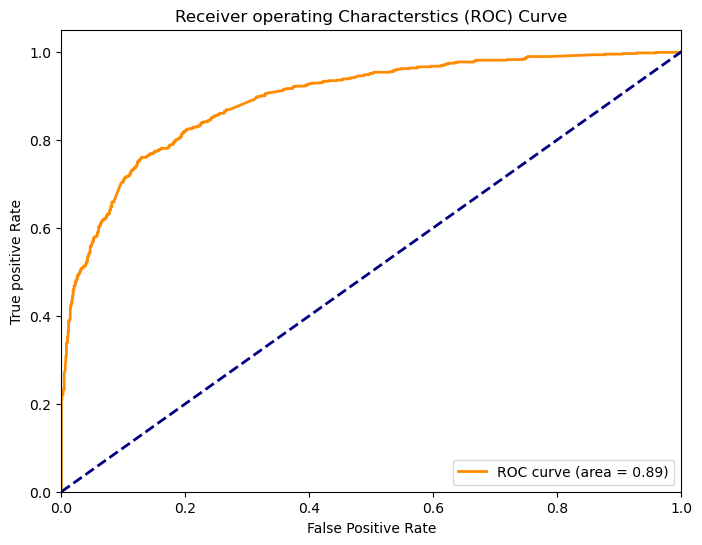

In [293]:
from sklearn.metrics import auc
roc_auc = auc(fpr, tpr)

#plot roc-auc curve
plt.figure(figsize=(8,6))  
plt.plot(fpr,tpr,color='darkorange',linewidth=2,label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1], color ='navy', linewidth=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Receiver operating Characterstics (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [295]:
#by default prediction class is decided with cut off 0.5
#but if you want to decide your own curt off, you have to use precision, recall, accuracy trade off
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [297]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Calculate precision, recall, and accuracy for different threshold probabilities
thresholds = np.linspace(0, 1, 100)
precisions = []
recalls = []
accuracies = []

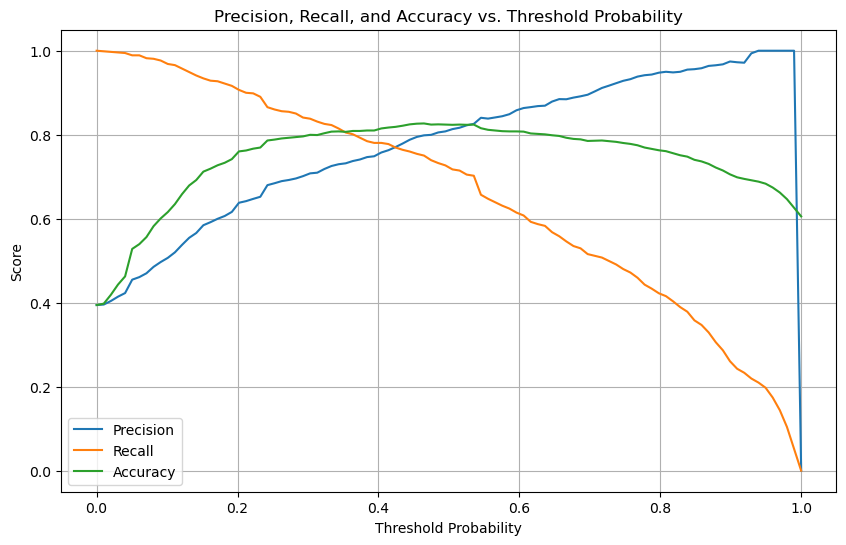

In [299]:
for threshold in thresholds:
    y_pred_threshold = (y_predict_proba >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    accuracy = accuracy_score(y_test, y_pred_threshold)
    precisions.append(precision)
    recalls.append(recall)
    accuracies.append(accuracy)
# Plot precision, recall, and accuracy against threshold probabilities
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, accuracies, label='Accuracy')
plt.xlabel('Threshold Probability')
plt.ylabel('Score')
plt.title('Precision, Recall, and Accuracy vs. Threshold Probability')
plt.legend()
plt.grid(True)
plt.show()

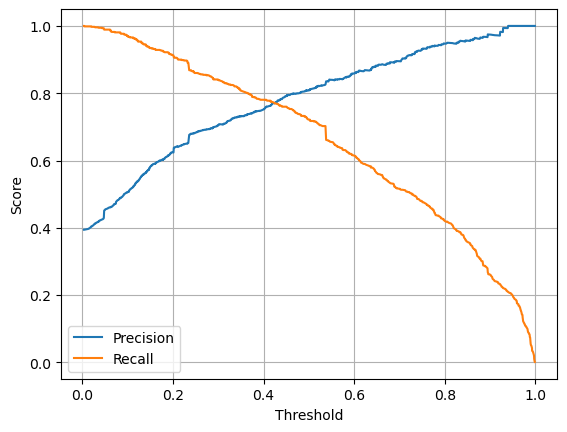

In [300]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_predict_proba)

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

## This Graph signifies:
X-axis (Threshold Probability):

As we increase the threshold, the model becomes more conservative in predicting the positive class (lead conversion), requiring higher confidence.
Y-axis (Metric Values - Precision, Recall, Accuracy):

Precision (Blue Line): Increases as the threshold increases.
This means fewer false positives, but we may miss actual positive cases.
Recall (Orange Line): Decreases as the threshold increases.
This means we are capturing fewer actual positives but with more precision.
Accuracy (Green Line): Shows how well the model is performing overall.
It initially improves but may decline at extreme thresholds.
Accuracy Behavior – Accuracy doesn’t necessarily follow a simple linear relationship because it depends on the dataset's class distribution.

In [304]:
# Since X_train is a sparse matrix, converting it to a DataFrame
X_train_dense = X_train.toarray()  # Convert to dense format
feature_names = preprocessor.get_feature_names_out()
X_train_df = pd.DataFrame(X_train_dense, columns=feature_names)  # Convert to DataFrame

# Now, you can access columns
feature_names = X_train_df.columns


# Extract coefficients
coefficients = classifier.coef_[0]

# Create DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': X_train_df.columns,'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display top 10 important features
print(feature_importance.head(10))

                                               Feature  Importance
4                       cat__Lead Origin_Lead Add Form    2.325670
14                   cat__Lead Source_Welingak Website    2.257280
16                    cat__Last Activity_Email Bounced    1.545032
87   cat__What is your current occupation_Working P...    1.403877
23          cat__Last Activity_Olark Chat Conversation    1.294039
101  cat__Last Notable Activity_Had a Phone Convers...    1.190140
86     cat__What is your current occupation_Unemployed    1.098572
1                     num__Total Time Spent on Website    1.094744
77                          cat__Specialization_Others    1.085707
49                                   cat__Country_Oman    1.069819


## TOP 3 features
1. Lead Origin, wherein Lead Add Form has highest conversion
2. Lead Source, wherein Welingak Website and reference have highest conversion
3. Last Activity, wherein Olark Chat Conversation, SMS sent have highest conversion

In [307]:
#Case when Company wish to make the lead conversion more aggressive. 
#They want almost all the potential leads (i.e., the customers who have been predicted as 1 by the model) to be converted and hence, 
#want to make phone calls to as much of such people as possible. 

threshold = 0.3  # Reduce threshold for aggressive lead conversion and decreasing false negatives
y_pred_adjusted = (y_predict_proba >= threshold).astype(int)
accuracy_score(y_test, y_pred_adjusted)

0.7992424242424242

In [309]:
# Case when the company wants the sales team to focus on some new work as well. 
#So, during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, 
#i.e., they want to minimize the rate of useless phone calls and focus on quality


threshold = 0.7  # Increase threshold to avoid false positives
y_pred_adjusted = (y_predict_proba >= threshold).astype(int)
accuracy_score(y_test, y_pred_adjusted)

0.7851731601731602

## X-Education has a better chance of converting a potential lead when:

1. The Lead origin is Lead add form: Leads who have responded/ or engaged through Lead Add Forms have had a higher chances of getting converted
2. It can be further said conversion rate is high for the leads that the X education get from Welingak Website and references, 
we can work on these two sources to get good quality leads
3. The leads which are actively interacting with the X_education through Olark chat, SMS sent and telephonic conversation have good conversion. This suggests follow-ups from chat interactions are important → Improve chatbot engagement.
4. Leads who are working professionals have high chances of getting converted.
5. People who were looking for better prospects like Unemployed, students, also show a higher interest in taking up courses.  

# Conclusion
In conclusion, the logistic regression model we developed proved to be a superior lead scoring model. In nearly 82% of cases, it correctly
assigns a higher lead score to leads that will convert compared to a lead who will not convert. By using this lead scoring model, the sales
team can increase their conversion rate to 82% by focusing on the quality features that we get from the model.
As a recommended next step for X Education, it would be valuable to determine a minimum lead score for sales representatives to bother contacting
a lead. This can be done after the cost of having a sales representatives contact a lead, as well as the value of a converted lead, has been
determined. Using a profit matrix, the optimal threshold for classification to maximize profit can be identified.